<a href="https://colab.research.google.com/github/WalterYeYint/100_Days_Of_Code_Programming_Practice/blob/main/Machine_Learning_with_Python/Tensorflow/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
%tensorflow_version 2.x   # not required unless you are in a notebook

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x   # not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.0


# Datasets

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape


194

In [5]:
type(train_images)

numpy.ndarray

In [8]:
train_images[0,23,23]   # looking at one pixel

194

In [9]:
train_labels[:10]   # looking at first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

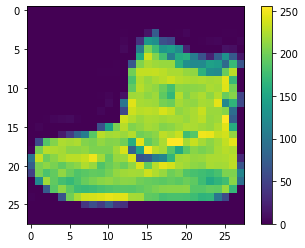

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In [12]:
# We want the data between 0 and 1.
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # input layer 1
    tf.keras.layers.Dense(128, activation='relu'),    # input layer 2
    tf.keras.layers.Dense(10, activation='softmax')    # input layer 3
])

# Model Compilation

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the Model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6421 - accuracy: 0.7723
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3870 - accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3434 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2752 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

# Evaluate Accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3627 - accuracy: 0.8701

Test accuracy: 0.8701000213623047


# Making Predictions

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)    # the model has predicted the label for each image in the testing set.

Trouser


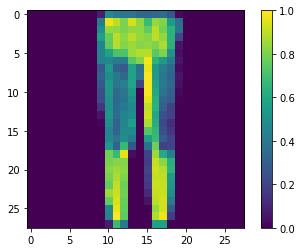

In [22]:
print(predictions[3])   
# displays the confidence values that represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing

print(np.argmax(predictions[3]))
# prints the value(which corresponds to one of ten clothes) that the model is most confident.

print(class_names[np.argmax(predictions[3])])    # the first prediction.
# np.argmax() returns the highest value in a list.

plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()